In [9]:
%pip install timm
%pip install torch==1.10.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 748.8 MB 5.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 2.3.0rc0+c6b5ca2 requires Pillow<=6.2.2, but you have pillow 9.0.1 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 881.9 MB 5.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstal

### Обучение модели

INFO: DEVICE is cuda
Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth ...

Validation	acc: 0.0000, wer: 1.0373, cer: 9.8598, loop_time: 0m 5s

Epoch 0, Loss: 2.58208, cer: 1.2238, LR: 0.0001318, loop_time: 0m 41s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.8360, loop_time: 0m 4s
Model weights saved

Epoch 1, Loss: 1.56934, cer: 0.6508, LR: 0.0003721, loop_time: 0m 54s

Validation	acc: 0.0000, wer: 0.9993, cer: 0.5282, loop_time: 0m 4s

Epoch 2, Loss: 0.98551, cer: 0.4698, LR: 0.0006690, loop_time: 0m 55s

Validation	acc: 0.0000, wer: 1.0014, cer: 0.4064, loop_time: 0m 4s

Epoch 3, Loss: 0.76787, cer: 0.4071, LR: 0.0009089, loop_time: 0m 52s

Validation	acc: 0.0000, wer: 0.9903, cer: 0.4162, loop_time: 0m 4s

Epoch 4, Loss: 0.66979, cer: 0.4091, LR: 0.0010000, loop_time: 0m 46s

Validation	acc: 0.0000, wer: 1.0013, cer: 0.3623, loop_time: 0m 9s

Epoch 5, Loss: 0.58333, cer: 0.4113, LR: 0.0009988, loop_time: 0m 43

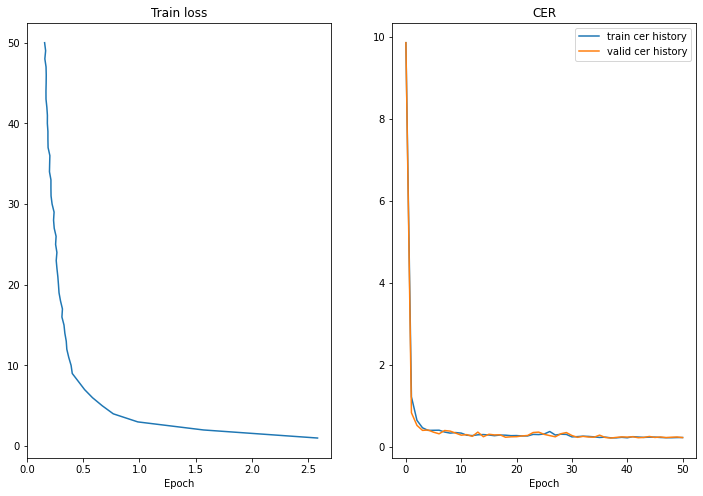

<Figure size 432x288 with 0 Axes>

In [14]:
#!g1.1
%run train.py

In [52]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor

In [51]:
images_directory = '../data/handwritten_names/test_v2/test'
models_directory = '../data/experiments/test'
CONFIG_PATH = './configs/ocr_config.json'
DEVICE = 'cuda'

In [53]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

models = sorted(models, key=lambda model_name: model_name[6:model_name.find('-', 6)], reverse=True)
model_path = join(models_directory, models[0])

In [64]:
image_path = join(images_directory, random.choice(images))

In [56]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth" to /tmp/xdg_cache/torch/hub/checkpoints/deit_tiny_patch16_224-a1311bcf.pth



Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth ...


In [65]:
img = cv2.imread(image_path)

In [66]:
#!g1.1
pred_data = predictor(img)

Prediction: ILAPEYRE


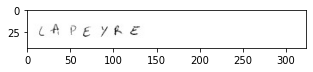

In [67]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)